In [12]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
class LinearRegression:
    def __init__(self):  
        self.a = 0
        self.b = 0
        self.l = 0.01  
        self.max_iterations = 10000
        self.threshold = 1e-5 
        
    def fit(self, X, y): 
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
        self.x_test = x_test
        self.y_test = y_test
        y_train_pred = self.a * x_train + self.b 
        cost_fun = 1/(2*len(y_train))*np.sum(np.square(y_train_pred-y_train))
        iterations = 0
        while cost_fun > self.threshold and iterations < self.max_iterations:
            diff = y_train_pred - y_train
            temp_a = self.a - self.l * 1 / len(y_train) * np.dot(diff.T, x_train)
            temp_b = self.b - self.l * 1 / len(y_train) * np.sum(diff)

            self.a = temp_a
            self.b = temp_b
            
            y_train_pred = self.a * x_train + self.b 
            cost_fun = 1/(2*len(y_train))*np.sum(np.square(y_train_pred-y_train))

            if iterations % 1000 == 0:
                print(f"Iteration {iterations}, Cost: {cost_fun}")
            iterations += 1

        y_test_pred = self.a * x_test + self.b 
        self.y_test_pred = y_test_pred
        cost_fun = 1/(2*len(y_test))*np.sum(np.square(y_test_pred-y_test))
        print("test cost", cost_fun)
        
    def predict(self, X):
        y_pred = self.a * X + self.b 
        print("pred values",y_pred)
        return y_pred

    def visualization(self):
        plt.scatter(self.x_test, self.y_test, color='red', marker='.', label='train test values')
        plt.plot(self.x_test, self.y_test_pred, color='blue', label='predicted values')
        plt.title('Train test data')
        plt.xlabel('Feature Values')
        plt.ylabel('target Values')
        plt.legend(loc='lower right')
        plt.show()

               

Iteration 0, Cost: 10.01462943381442
Iteration 1000, Cost: 0.09463141186995337
Iteration 2000, Cost: 0.07868865340854467
Iteration 3000, Cost: 0.07859642700821767
Iteration 4000, Cost: 0.07859589349270733
Iteration 5000, Cost: 0.07859589040640232
Iteration 6000, Cost: 0.07859589038854851
Iteration 7000, Cost: 0.07859589038844525
Iteration 8000, Cost: 0.07859589038844465
Iteration 9000, Cost: 0.07859589038844464
test cost 0.08141155322629522


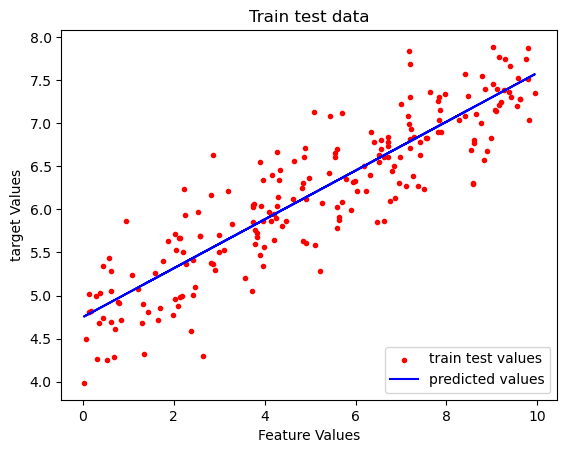

pred values [5.0775664  7.54895421 6.34060397 4.84133145 7.24390447 7.55640375
 6.0954778  6.52683553 7.12939843 4.83212663 6.26319779 5.72977666
 5.55451242 7.20307793 6.6567661  7.05776956 6.15657934 6.18644407
 5.11442829 6.96755942 6.21472812 7.45952149 5.79513444 5.69861979
 7.26099252 6.16599711 7.05188738 4.83981781 4.84951463 5.47098207
 5.38316191 7.25836883 6.93389905 6.92586105 6.21178819 5.54577709
 6.2170485  5.451841   6.57806493 5.00201914 7.51567794 4.84188315
 5.73785948 6.22269604 4.85864496 5.09611834 5.81942533 6.01169236
 5.02450693 7.01859261 5.17104483 5.83189202 6.13549588 5.3768368
 7.20353218 5.82944841 6.72076829 6.87011591 6.57166694 6.84288149
 6.94070573 7.36416732 7.38933643 6.86653491 6.087195   6.78117862
 6.68884008 5.69143884 7.29347774 6.11177806 7.47020971 5.806653
 5.41646619 5.68237064 5.67603302 6.45990506 6.71981256 7.10740087
 5.43994987 6.97474327 7.40142829 5.80342226 7.47204383 6.37439275
 5.95134448 6.03882219 7.50295334 5.36905646 7.174694

In [13]:
file_path = 'wids-agent-jackie-assignment-1/train.csv'
df = pd.read_csv(file_path)
data_set = df.to_numpy()

lr = LinearRegression()
lr.fit(data_set[:,1], data_set[:,2])
lr.visualization()

test_path = 'wids-agent-jackie-assignment-1/test.csv'
test_i = pd.read_csv(test_path)
test = test_i.to_numpy()

pred = lr.predict(test[:,1])
df_pred = pd.DataFrame({'prediction': pred})
df_pred.to_csv('prediction.csv', index=True, index_label= "row_id")

